# 03 (CNN) Computer Vision
https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Computer vision libraries in PyTorch** | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.  |
| **1. Load data** | To practice computer vision, we'll start with some images of different pieces of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| **2. Prepare data** | We've got some images, let's load them in with a [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) so we can use them with our training loop. |
| **3. Model 0: Building a baseline model** | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. | 
| **4. Making predictions and evaluating model 0** | Let's make some predictions with our baseline model and evaluate them. |
| **5. Setup device agnostic code for future models** | It's best practice to write device-agnostic code, so let's set it up. |
| **6. Model 1: Adding non-linearity** | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| **7. Model 2: Convolutional Neural Network (CNN)** | Time to get computer vision specific and introduce the powerful convolutional neural network architecture. |
| **8. Comparing our models** | We've built three different models, let's compare them. |
| **9. Evaluating our best model** | Let's make some predictions on random images and evaluate our best model. |
| **10. Making a confusion matrix** | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| **11. Saving and loading the best performing model** | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

## 0. Computer Vision Libraries
| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. | 
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. | 
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  | 
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

In [47]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.5.0+cu124
torchvision version: 0.20.0+cpu


## 1. Getting dataset MNIST

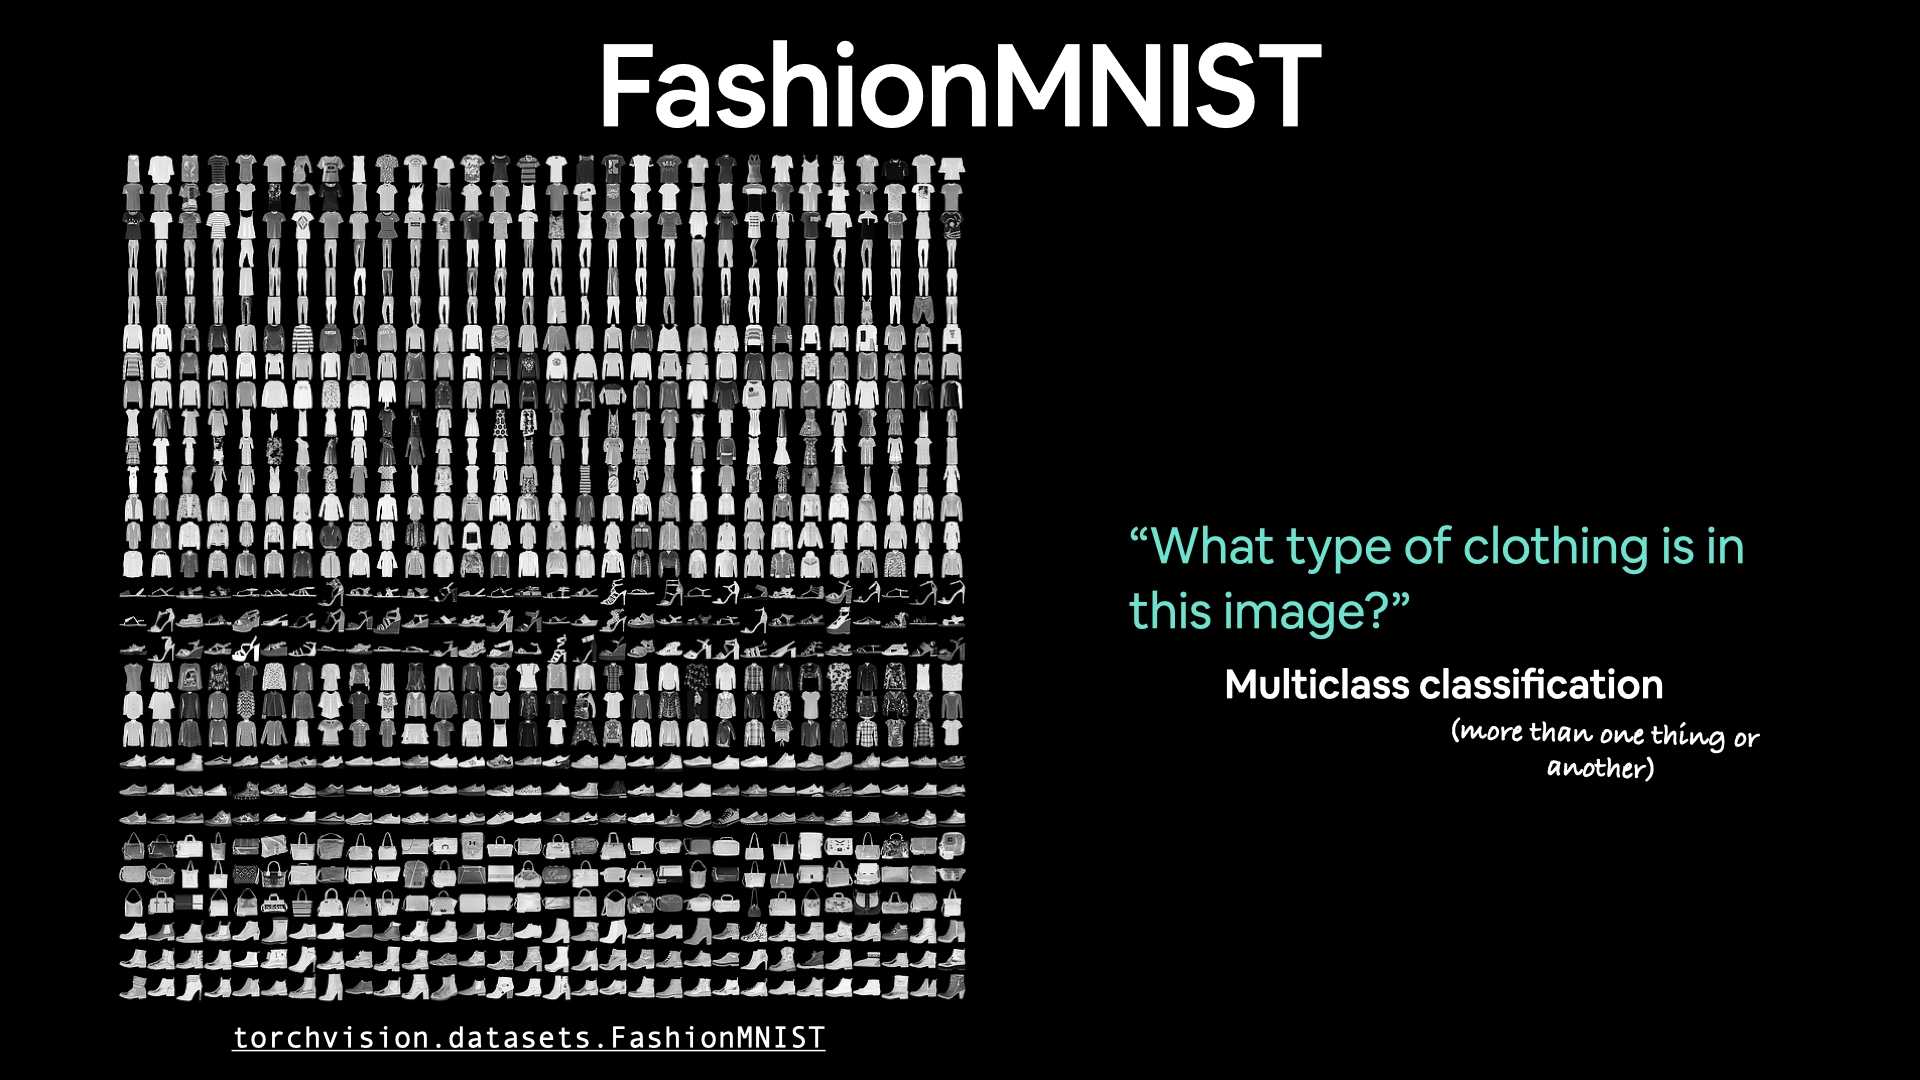

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

In [48]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True, # get traning data
    download=True, # download if not available
    transform=ToTensor() # convert data to tensor
)

# setup test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True, # download if not available
    transform=ToTensor() # convert data to tensor
)

In [49]:
image, data = train_data[0] # get first image and label

data, image

(9,
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.00

### 1.1 Shape

In [50]:
image.shape # shape of the image, 1 channel, 28x28 pixels

torch.Size([1, 28, 28])

1 Channel indicated grayscale
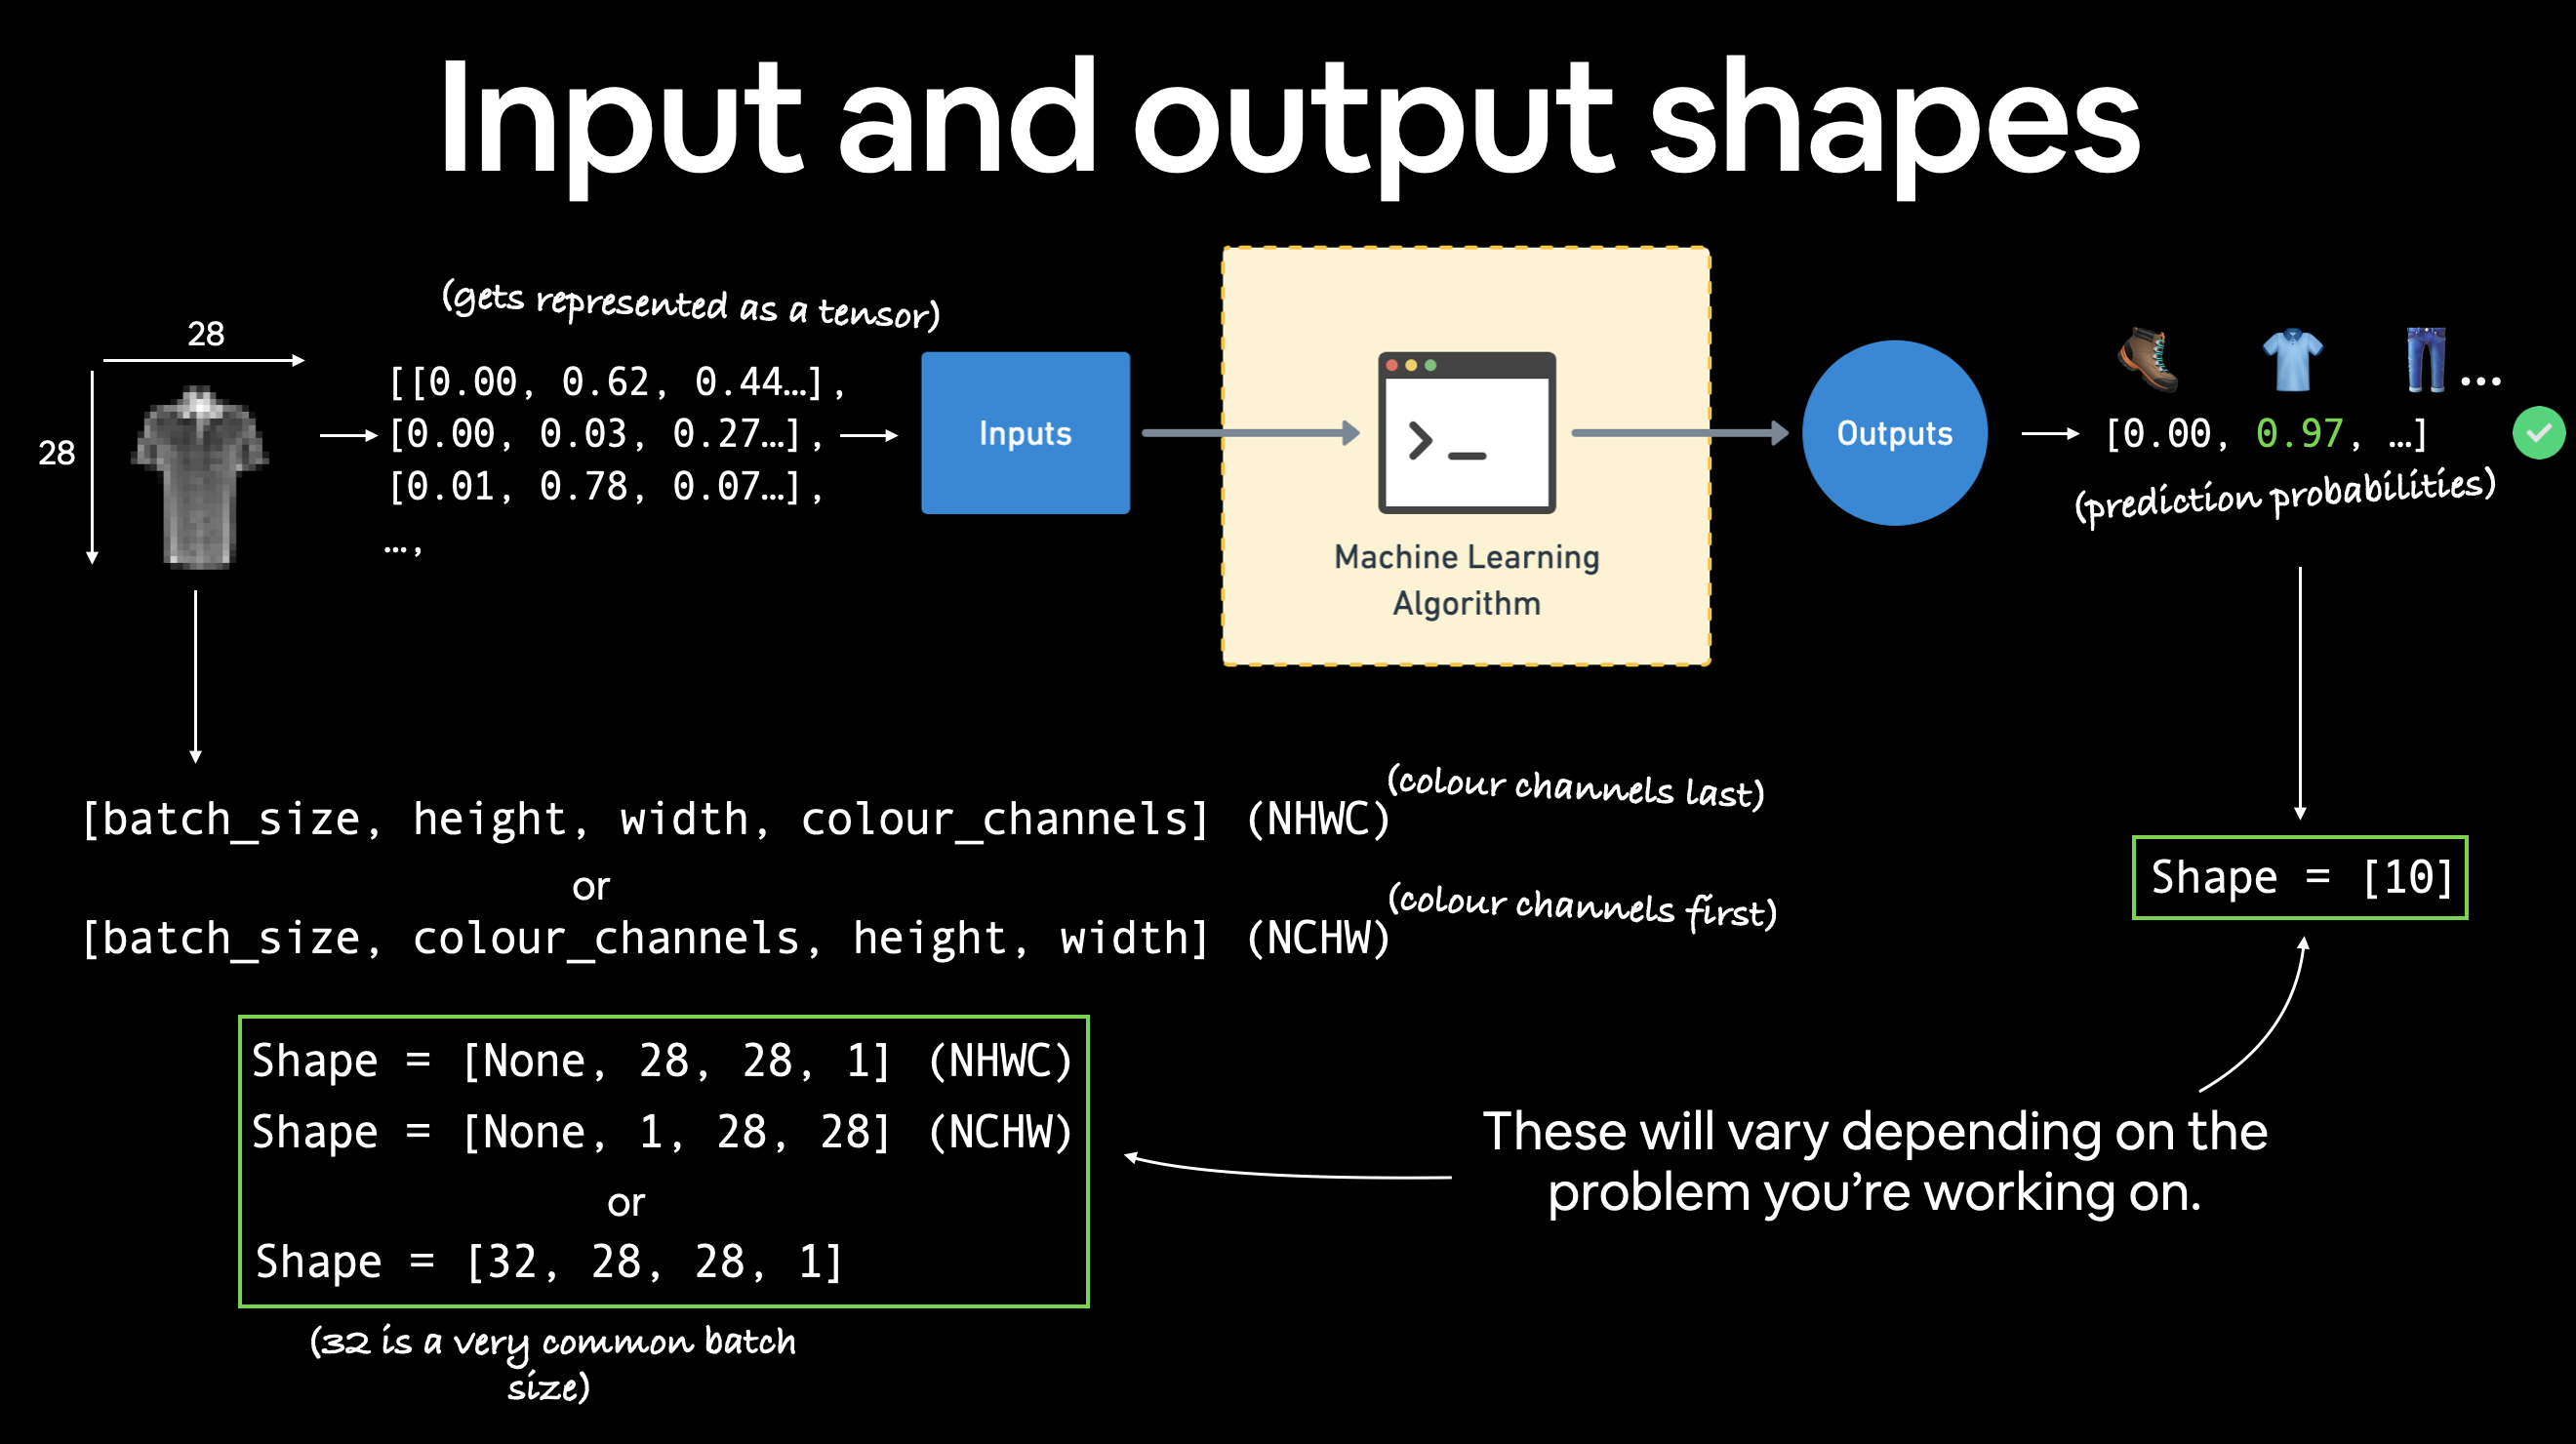

If color_channels=3, the image comes in pixel values for red, green and blue (this is also known as the RGB color model).

The order of our current tensor is often referred to as CHW (Color Channels, Height, Width).

There's debate on whether images should be represented as CHW (color channels first) or HWC (color channels last).

In [51]:
# sample number
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

# 60,000 training samples and 10,000 test samples

(60000, 60000, 10000, 10000)

In [52]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# 1.2 Visualization

In [53]:
import matplotlib.pyplot as plt

torch.Size([28, 28])


Text(0.5, 1.0, 'Ankle boot, 9')

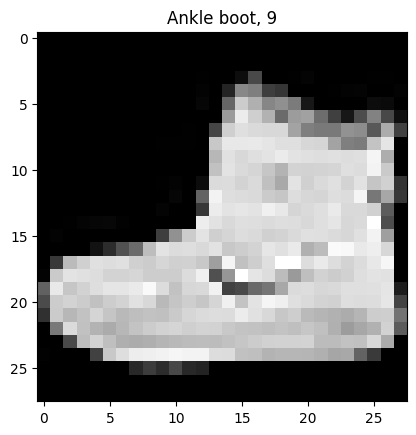

In [54]:
image, label = train_data[0] # see first image

print(image.squeeze().shape)
plt.imshow(image.squeeze(), cmap='gray') # image.squeeze() removes the channel dimension
plt.title(f'{class_names[label]}, {label}')

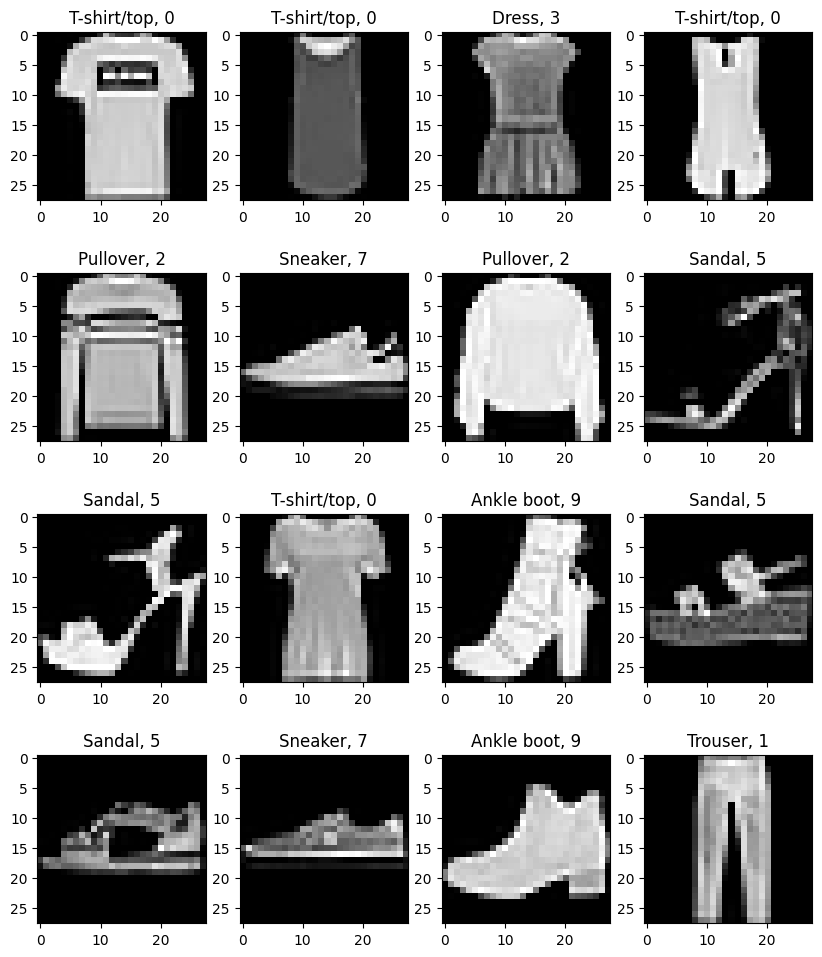

In [55]:
rows, cols = 4, 4

fig = plt.figure(figsize=(10, 12))

for i in range(1, rows*cols + 1):
    image, label = train_data[i]
    plt.subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'{class_names[label]}, {label}')

## 2.0 Prepare DataLoader

We can prepare our data using `torch.utils.data.DataLoader`

Helps us load the data into a model, it takes large dataset and turns it into **smaller chunks** `batch_size` as its more computationally efficient

**32** is a good starting batch size for many programs

The value is a hyperparamter so it can be changed (32, 64, 128, etc.)

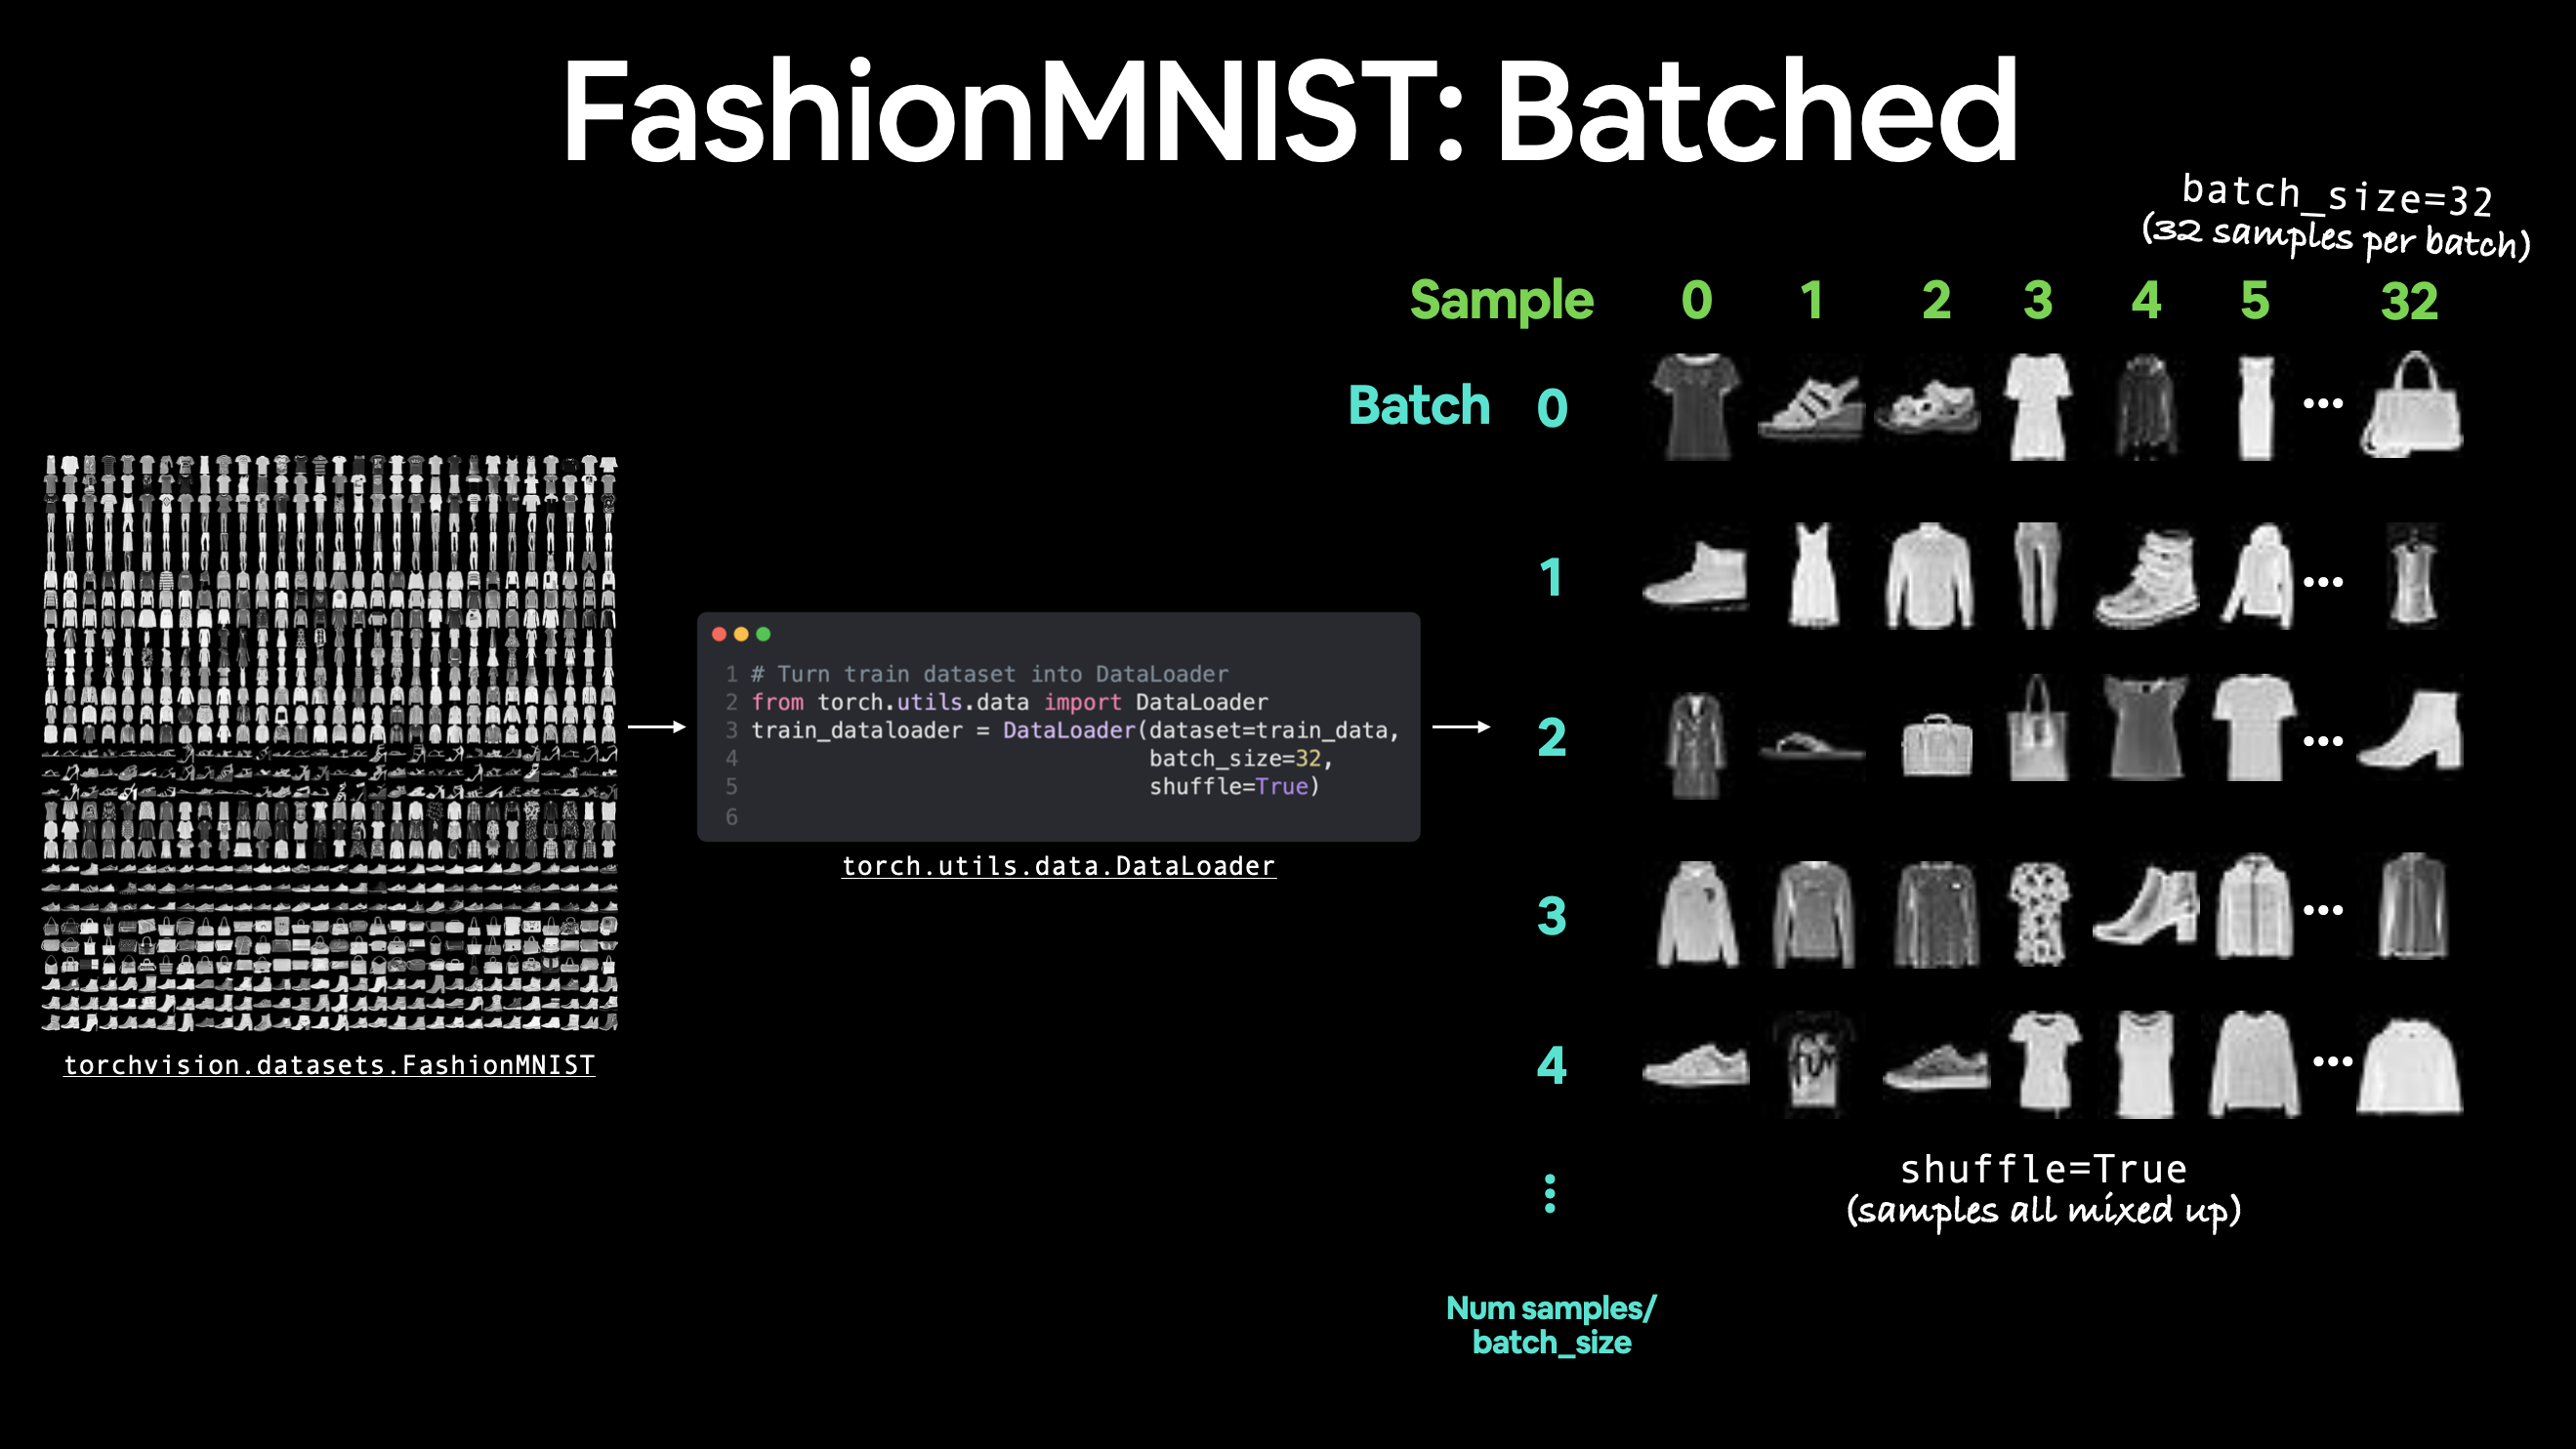

In [56]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    train_data,
    batch_size=64, #batches of 64
    shuffle=True # shuffle data each epoch
)

In [57]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
#next(iter()) returns the next item from the iterator

In [58]:
torch.manual_seed(42)

## 3.0 Model Building

Baseline will be 2 `nn.Linear()` layers

We'll also have to use `nn.Flatte()` which compresses the dimention into a single vector

In [64]:
flattened_model = nn.Flatten() # all nnmodules have forward method

x = train_features_batch[0] #sample

output = flattened_model(x)

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [65]:
from torch import nn

class FashionImageModelV0(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x)

- `input_shape=748` - features going into model 
- `hidden_units=128` - number of neutons / hidden layers can any number
 - `output_shape = len(class_names)` - possible number of classes

In [ ]:
torch.manual_seed(42)

model_0 = FashionImageModelV0(
    input_shape=28*28, 
    hidden_units=128, 
    output_shape=10)
model_0.to('cuda') # move model to GPU